In [1]:
import numpy as np
from figaro.mixture import DPGMM
from figaro.plot import plot_median_cr
from figaro.utils import get_priors
from figaro.load import save_density
from tqdm import tqdm

In [2]:
data_double_gaussian = np.loadtxt('./data/double_gaussian.txt')

In [3]:
M_min = 0
M_max = 200
n_draws = 1000

mix_double_gaussian = DPGMM([[M_min, M_max]], prior_pars=get_priors([[M_min, M_max]], data_double_gaussian))
draws_double_gaussian = np.array([mix_double_gaussian.density_from_samples(data_double_gaussian) for _ in tqdm(range(n_draws))])

100%|██████████| 1000/1000 [08:38<00:00,  1.93it/s]


In [ ]:
save_density(draws_double_gaussian)

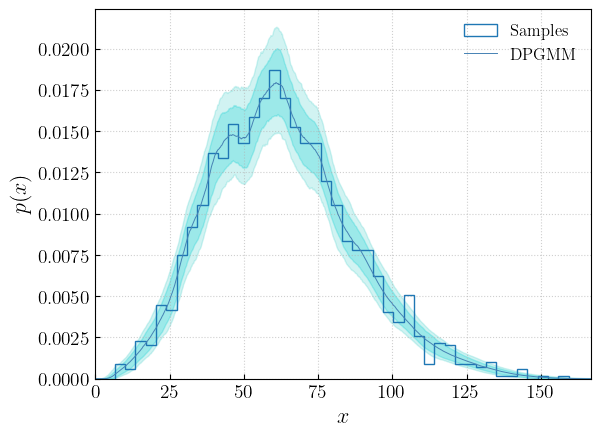

In [4]:
fig = plot_median_cr(draws_double_gaussian, samples=data_double_gaussian, save=True, show=False)
fig.axes[0].set_xlabel('$M_z\ [\mathrm{M}_\odot]$')
fig.axes[0].set_ylabel('$p(M_z|\mathrm{obs})$')
# fig.savefig('./observed_figaro.pdf', bbox_inches='tight')
fig